### Признаки  
id — уникальный идентификатор скважины;
f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
### Целевой признак  
product — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных <a id="1"></a>

Загружаем библиотеки

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import scipy.stats as st

Загрузка файла и ознакомление с ним <a id="12"></a>

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')
print(data_0.head(10))
print(data_1.head(10))
print(data_2.head(10))

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
5  wX4Hy  0.969570  0.489775 -0.735383   64.741541
6  tL6pL  0.645075  0.530656  1.780266   49.055285
7  BYPU6 -0.400648  0.808337 -5.624670   72.943292
8  j9Oui  0.643105 -0.551583  2.372141  113.356160
9  OLuZU  2.173381  0.563698  9.441852  127.910945
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
5  HHckp  -3.327590  -2.205276  3.003647   84.038886
6  h5Ujo -11.142655 -10.133399  4.002382  110.992147
7  muH9x   4.23

In [3]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
data_0.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


In [7]:
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


In [8]:
data_2.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


посмотрим на корреляцию <a id="13"></a>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f860d246110>,
      dtype=object)

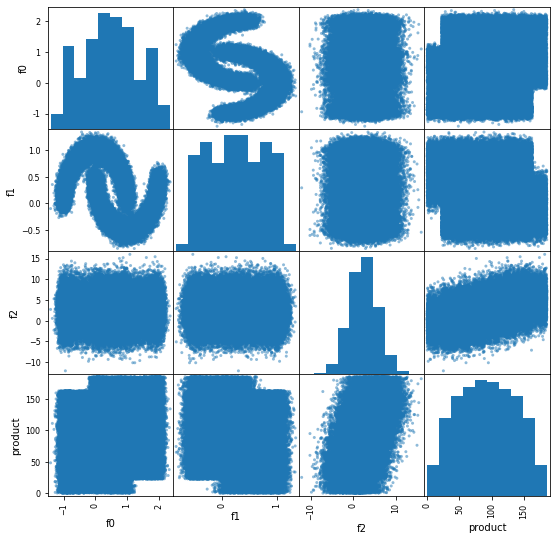

In [9]:
pd.plotting.scatter_matrix(data_0, figsize=(9, 9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86046129d0>,
      dtype=object)

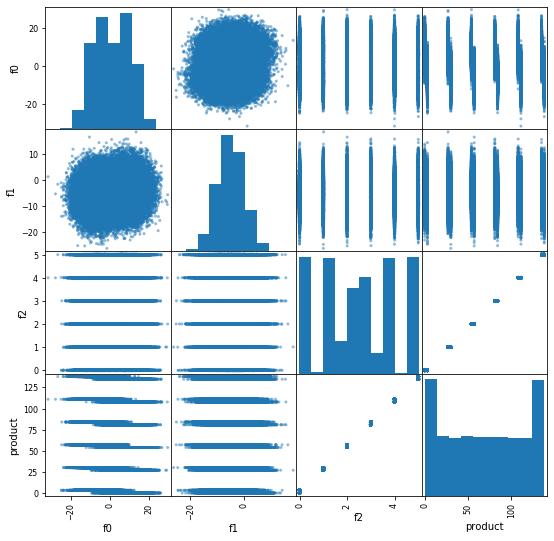

In [10]:
pd.plotting.scatter_matrix(data_1, figsize=(9, 9))

большая зависимость между столбцами F2 и product, удаляем f2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86028613d0>,
      dtype=object)

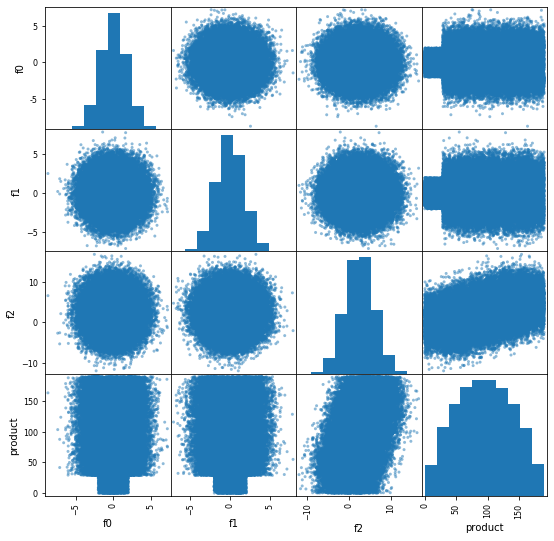

In [11]:
pd.plotting.scatter_matrix(data_2, figsize=(9, 9))

удаляем ненужные столбцы <a id="14"></a>

In [12]:
data_0 = data_0.drop(['id'], axis=1)
data_1 = data_1.drop(['id'], axis=1)
data_2 = data_2.drop(['id'], axis=1)


### Вывод <a id="15"></a>

Загрузили файл, посмотриели информацию, пропусков нет, проверили корреляцию, в базе data_1 выявлена большая зависимость, удаляем столбец f2. и в остальных удалили столбец id  в нем нет смысла  
p.s. прикольные графики

## Обучение и проверка модели <a id="2"></a>

создаем функцию для обучения модели, расчета среднего запаса, и rmse <a id="21"></a>

In [13]:
state = np.random.RandomState(95731)

In [14]:
def in_valid(data):
    features = data.drop(['product'], axis=1)
    target = data['product']
    
    #features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=state)
    
    scaler = MinMaxScaler()
    #scaler.fit(features_train)
    features_train = scaler.fit_transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    model = LinearRegression(normalize=False)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    predicted_valid = pd.Series(predicted_valid)
    rmse = (mean_squared_error(predicted_valid, target_valid))**(0.5)
    product = sum(predicted_valid) / len(predicted_valid)
    
    print("RMSE: {0:.2f}".format(rmse))
    print("средний запас предсказанного сырья: {0:.2f}".format(product))
    
    return (predicted_valid.reset_index(drop=True), target_valid.reset_index(drop=True), rmse)
    
    

In [15]:
predict1, valid1, rmse1 = in_valid(data_0)

RMSE: 37.86
средний запас предсказанного сырья: 92.67


In [16]:
predict2, valid2, rmse2 = in_valid(data_1)

RMSE: 0.89
средний запас предсказанного сырья: 68.47


In [17]:
predict3, valid3, rmse3 = in_valid(data_2)

RMSE: 39.87
средний запас предсказанного сырья: 95.17


### Вывод  <a id="22"></a>

выксокий средний запас наблюдается в 1 регионе и в 3, но при этом RMSE ниже в 1 регионе

## Подготовка к расчёту прибыли <a id="3"></a>

сохраняем ключевые значения и расчитываем точку без убытьочности

In [18]:
budjet = 10000000
dohod = 450
razr = 200
barr = budjet / dohod
print("Точка безубыточности: {0:.0f} тыс. баррелей".format(barr))

Точка безубыточности: 22222 тыс. баррелей


расчитывае средний объем скважины для без убыточности

In [19]:
obem = barr / razr
print("Средний объем нефти в скважине для безубыточного функционирования:", obem)


Средний объем нефти в скважине для безубыточного функционирования: 111.11111111111111


### Вывод <a id="31"></a>

точка без убыточности для региона составляет 22222 тыс. баррелей, Средний объем нефти в скважине для безубыточного функционирования: 111 тыс. бар

## Расчёт прибыли и рисков <a id="4"></a>

пишем функцию для предсказания объема с 200 самых больших скважин  и прибыли

In [20]:
def profit_1(predictions, target):
    pred_sorted = predictions.sort_values(ascending=False)
    select_points = target[pred_sorted.index][:200]
    product = select_points.sum()
    rev = product * dohod
    return rev - budjet

In [26]:
def find_risk(predictions, target):
    
    revenue = []
    
    for _ in range(1000):
        
        target_sample = target.sample(500, replace=True, random_state=state)
        predictions_sample = predictions[target_sample.index]
        revenue.append(profit_1(predictions_sample, target_sample)) 
        
    lower = int(np.percentile(revenue, 2.5))
    higher = int(np.percentile(revenue, 97.5))
    mean_revenue =int(sum(revenue) / len(revenue))
    risk = st.percentileofscore(revenue, 0)
    return ((lower, higher), mean_revenue, risk)


In [27]:
i = 1
for preds, target in zip([predict1, predict2, predict3], 
                         [valid1, valid2, valid3]):
    interval, mean_revenue, risk = find_risk(preds, target)
    print(f"Region {i}:")
    print(f"среднее значение: {mean_revenue}")
    print(f"95% confidence interval: {interval}")
    print(f"Риск: {risk}")
    i+=1

Region 1:
среднее значение: 518671
95% confidence interval: (-52830, 1062908)
Риск: 3.4
Region 2:
среднее значение: 506847
95% confidence interval: (97370, 944343)
Риск: 0.8
Region 3:
среднее значение: 403917
95% confidence interval: (-142638, 953022)
Риск: 7.5


 ### Вывод  <a id="5"></a>  
 
 Вывод оказался не ожиданным, регион с самым низким средним запасом, оказался с самым низким уровнем риска